In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , KFold , cross_val_score , RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler , RobustScaler , LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,recall_score , roc_auc_score , plot_confusion_matrix , plot_precision_recall_curve , plot_roc_curve

In [2]:
df = pd.read_csv('data/forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [4]:
df.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep'],axis = 1,inplace = True)

In [5]:
df.shape

(517, 12)

In [6]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [7]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


# Data Visualization

In [9]:
df['size_category'].unique()

array(['small', 'large'], dtype=object)

## FFMC vs size

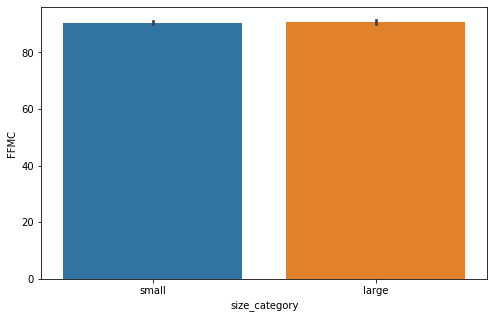

In [10]:
plt.figure(figsize = (8,5))
sns.barplot(y = df['FFMC'] , x = df['size_category'])

#### FFMC index is around 100 for both small and large fires

## DMC vs Size

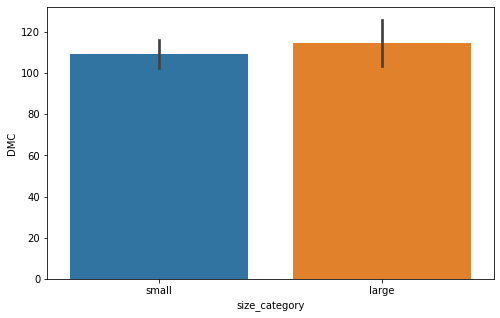

In [11]:
plt.figure(figsize = (8,5))
sns.barplot(y = df['DMC'] , x = df['size_category'])

In [12]:
df[df['size_category'] == 'small']['DMC'].mean(), df[df['size_category'] == 'large']['DMC'].mean()

(109.52539682539685, 114.5352517985611)

#### Mean DMC index is around 110 for small fires and 115 for large fires

## DC vs size

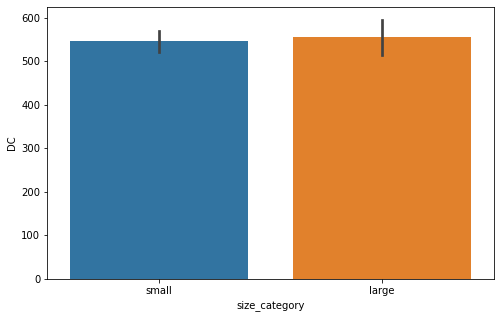

In [13]:
plt.figure(figsize = (8,5))
sns.barplot(y = df['DC'] , x = df['size_category'])

In [14]:
df[df['size_category'] == 'small']['DC'].mean(), df[df['size_category'] == 'large']['DC'].mean()

(545.020370370371, 555.8798561151082)

#### Mean DC Index is around 545 for small fires and 556 for large fires

## ISI vs size

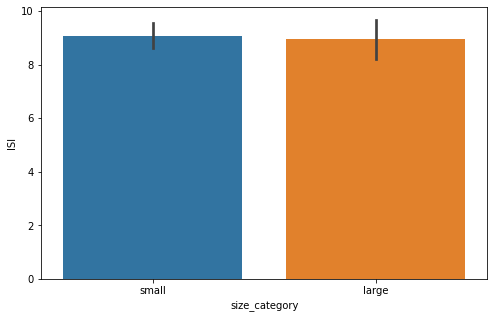

In [15]:
plt.figure(figsize = (8,5))
sns.barplot(y = df['ISI'] , x = df['size_category'])

In [16]:
df[df['size_category'] == 'small']['ISI'].mean(), df[df['size_category'] == 'large']['ISI'].mean()

(9.04576719576719, 8.95611510791367)

#### Mean ISI Index is around 9 for small and large fire

## Temperature vs size

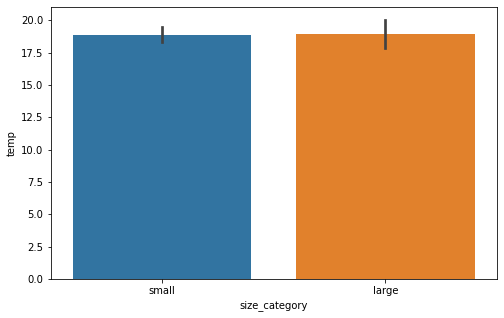

In [17]:
plt.figure(figsize = (8,5))
sns.barplot(y = df['temp'] , x = df['size_category'])

In [18]:
df[df['size_category'] == 'small']['temp'].mean(), df[df['size_category'] == 'large']['temp'].mean()

(18.867989417989406, 18.94676258992806)

#### Mean temperature was around 19C when most of the small and large fires broke

## RH vs size

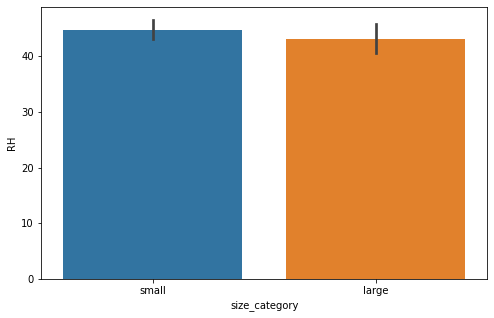

In [19]:
plt.figure(figsize = (8,5))
sns.barplot(y = df['RH'] , x = df['size_category'])

In [20]:
df[df['size_category'] == 'small']['RH'].mean(), df[df['size_category'] == 'large']['RH'].mean()

(44.735449735449734, 43.07194244604317)

#### Humidity % was around 45% when small and 43% when large fire broke

## wind vs size

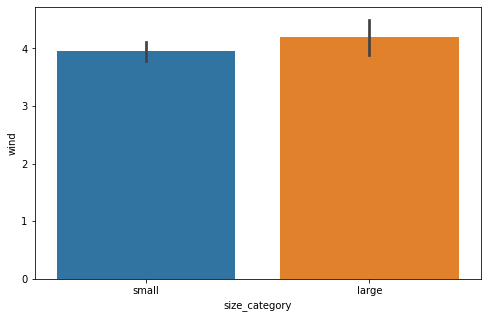

In [21]:
plt.figure(figsize = (8,5))
sns.barplot(y = df['wind'] , x = df['size_category'])

In [22]:
df[df['size_category'] == 'small']['wind'].mean(), df[df['size_category'] == 'large']['wind'].mean()

(3.953439153439155, 4.192086330935251)

#### Average wind speed was around 4km/h when small and large fires broke

## Temp vs humidity over months

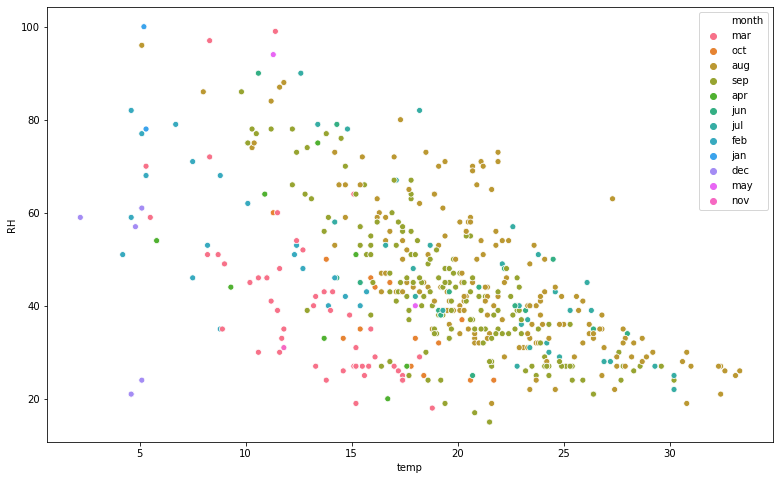

In [23]:
plt.figure(figsize = (13,8))
sns.scatterplot(x = df['temp'],y=df['RH'],hue=df['month'])

#### August month a wide range of humidity % over temperature. We can check how many large fires have broke during this month<br>There are some cases in january when there is high humidity% even on low temperatures<br>Overall trend suggests that as the temperature increases, the humidity decreases

## Temp vs wind over months

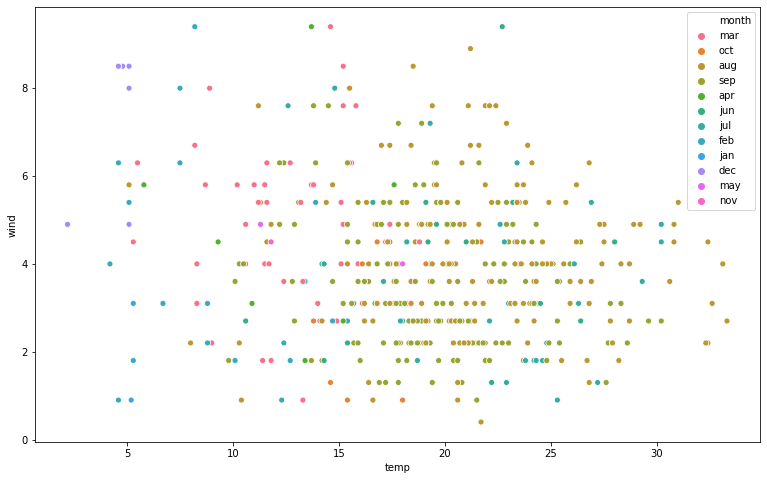

In [24]:
plt.figure(figsize = (13,8))
sns.scatterplot(x = df['temp'],y=df['wind'],hue=df['month'])

#### No perfect trend can be observed through this plot

## Rain over months

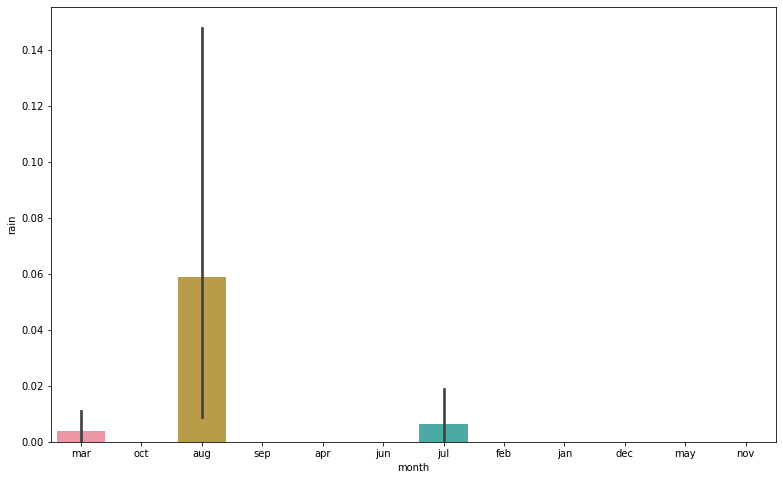

In [25]:
plt.figure(figsize = (13,8))
sns.barplot(y=df['rain'],x=df['month'])

#### The precipitation is highest in the month of August<br>Some precipitation can be observed in the month of March and July

In [26]:
label = LabelEncoder()
df['size_category'] = label.fit_transform(df['size_category'])

## No. of small fires broke per month

Text(0.5, 1.0, 'No. of small fires over months')

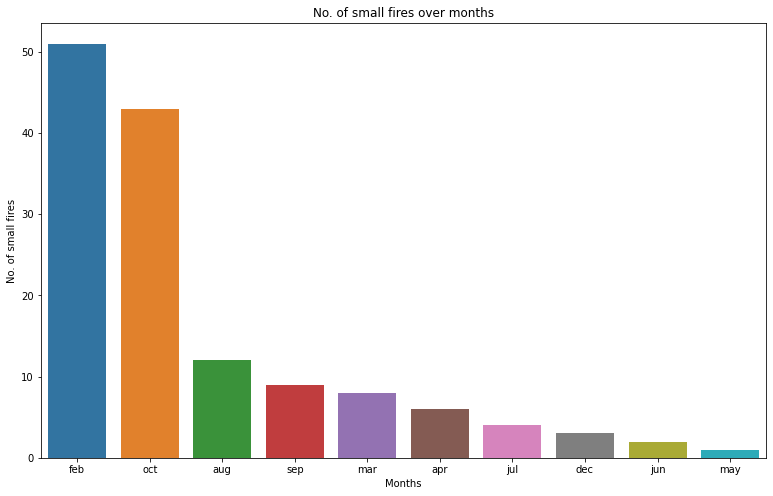

In [27]:
plt.figure(figsize = (13,8))
sns.barplot(y=df[df['size_category']==0]['month'].value_counts(),x=df[df['size_category']==0]['month'].unique())
plt.ylabel('No. of small fires')
plt.xlabel('Months')
plt.title('No. of small fires over months')

#### Highest no. of small fires broke in the month of February

## No. of large fires broke per month

Text(0.5, 1.0, 'No. of large fires over months')

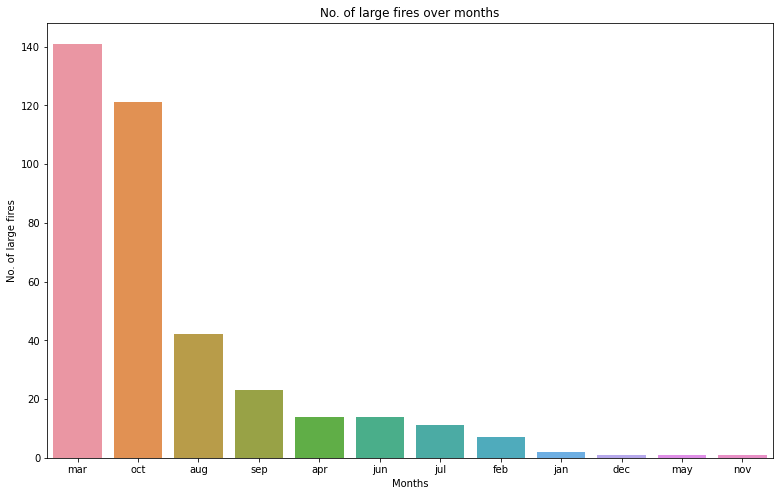

In [28]:
plt.figure(figsize = (13,8))
sns.barplot(y=df[df['size_category']==1]['month'].value_counts(),x=df[df['size_category']==1]['month'].unique())
plt.ylabel('No. of large fires')
plt.xlabel('Months')
plt.title('No. of large fires over months')

#### Most of the large fires broke over the month of March followed by October

## Total fires broke per month

Text(0.5, 1.0, 'No. of fires over months')

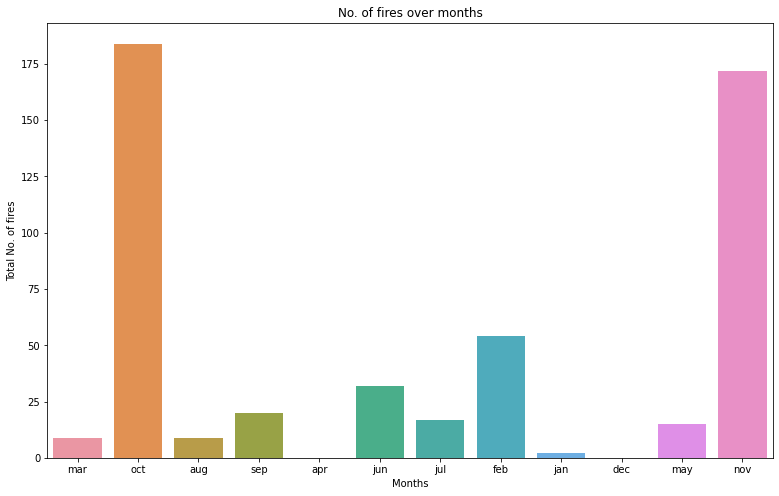

In [29]:
plt.figure(figsize = (13,8))
sns.barplot(y=(df[df['size_category']==0]['month'].value_counts() + df[df['size_category']==1]['month'].value_counts()),x=df['month'].unique())
plt.ylabel('Total No. of fires')
plt.xlabel('Months')
plt.title('No. of fires over months')

#### Overall , highest no. of fires broke in the month of October followed by November

# Pre-processing

## One-Hot Encoding

In [30]:
df = pd.get_dummies(df, drop_first=True)

In [31]:
df.shape

(517, 27)

## Data-Splitting

In [32]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.20, random_state=42)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((413, 26), (104, 26), (413,), (104,))

## Normalizing

In [33]:
scale = MinMaxScaler()

In [34]:
X = scale.fit_transform(X)

# Modelling

In [35]:
# Creating a dataframe to keep record of auc scores
model = []
accuracy = []
roc_auc = []
def performance(new_model , new_roc_auc , new_accuracy):
    model.append(new_model)
    roc_auc.append(new_roc_auc)
    accuracy.append(new_accuracy)
    score_df = pd.DataFrame(zip(model , roc_auc,accuracy) , columns = ['Model', 'ROC_AUC','Accuracy Score'], index = None)
    #print(score_df)
    return score_df

In [36]:
clf_svm = SVC(C=0.1 , gamma= 0.1 , kernel= 'rbf')
clf_svm.fit(X_train , y_train)
y_pred_train = clf_svm.predict(X_train)
y_pred_test = clf_svm.predict(X_test)
train_roc_auc_svm = roc_auc_score(y_train, y_pred_train)
train_accuracy_svm = accuracy_score(y_train , y_pred_train)
performance('Training Data',train_roc_auc_svm,train_accuracy_svm)
test_roc_auc_svm = roc_auc_score(y_test,y_pred_test)
test_accuracy_svm = accuracy_score(y_test , y_pred_test)
performance('Testing Data',test_roc_auc_svm, test_accuracy_svm)

,Model,ROC_AUC,Accuracy Score
0,Training Data,0.5,0.900726
1,Testing Data,0.5,0.875000


#### Training and testting accuracy is similar . It implies our model has not overfitted.

# Experimental analysis

## Confusion matrix for testing data

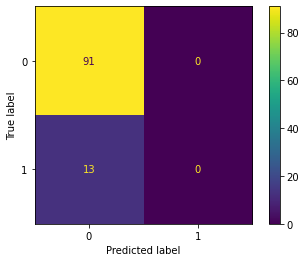

In [38]:
plot_confusion_matrix(clf_svm , X_test , y_test)

## ROC curve for testing data

<Figure size 936x576 with 0 Axes>

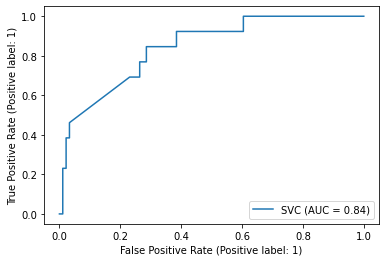

In [41]:
plot_roc_curve(clf_svm , X_test , y_test)